### Edgar Moises Hernandez-Gonzalez
#### 11/03/20-14/04/20
#### Imagen de CWT de EEG

In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
import cv2

In [0]:
#canal = pd.read_csv("MI-EEG-A01T.csv", header=None).iloc[:, 7000:8000] #canal C3
canal = pd.read_csv("/content/drive/My Drive/Documentos/Moyete/Estudiando/Programacion/PythonML/Espectros/MI-EEG-A01T.csv", header=None).iloc[:, 11000:12000] #canal C4 (usar este)

(1000,)


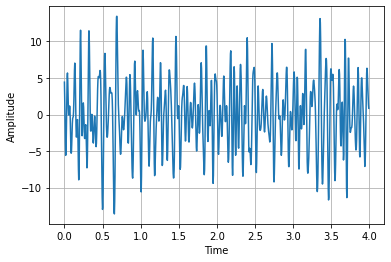

In [5]:
# Señal EEG del sujeto 1
# 4 segundos con fs=250Hz

fs = 250
time = np.arange(0, 4, 1/fs)
sig = canal.iloc[2] #la muestra 2 es mano derecha
print(sig.shape)

plt.plot(time, sig)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [6]:
frecuencias = pywt.scale2frequency('cmor3-3', [2,4,8,16,32,64,128,256,512,1024]) / (1/fs)
print("Frecuencias para diferentes escalas cmor3-3: \n", frecuencias)

Frecuencias para diferentes escalas cmor3-3: 
 [375.         187.5         93.75        46.875       23.4375
  11.71875      5.859375     2.9296875    1.46484375   0.73242188]


In [0]:
coef, freqs = pywt.cwt(sig, np.arange(1,129), 'cmor3-3')

In [0]:
x = abs(coef)

(128, 1000)


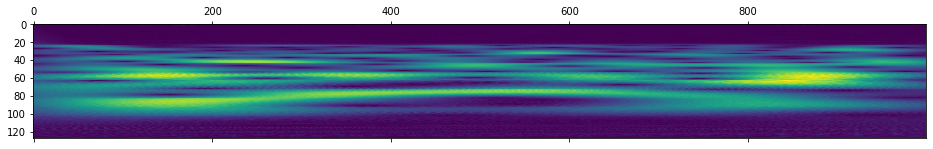

In [9]:
print(x.shape)
plt.matshow(x)
plt.show()

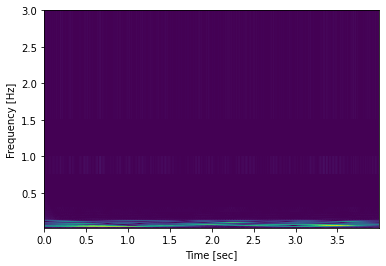

In [10]:
plt.pcolormesh(time, freqs, x)
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()

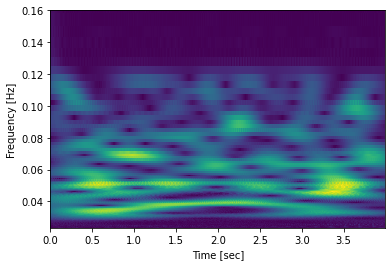

In [11]:
plt.pcolormesh(time, freqs, x)
plt.axis([0, time[-1:], freqs[-1:], 0.16])
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()

(16, 125)


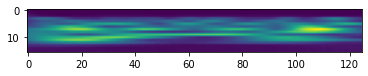

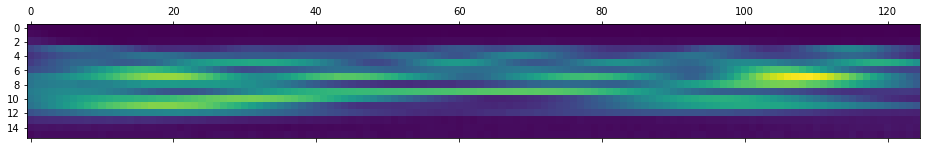

In [12]:
dim = (125, 16) #ancho, alto

resized = cv2.resize(x, dim, interpolation=cv2.INTER_AREA)
print(resized.shape)
plt.imshow(resized)
plt.show()

plt.matshow(resized)
plt.show()

##### Prueba de analisis de imagenes

In [0]:
#x2 = x
#x2 = MinMaxScaler(feature_range=(0, 255)).fit_transform(x)
#x2 = StandardScaler().fit_transform(x)

#talvez esta linea no hace falta porque /255 siempre da flotantes
#x2 = np.floor(x2) # aqui talvez puede ser ceil

#convertir a float
#x = x.astype('float32')

#escalar los valores en un rango de 0 a 1 (normalizar)
#x /= 255.0

# los valores siempre son float
#print(x2.shape)
#print(x2)
#plt.imshow(x2, cmap='Greys')
#plt.show()

In [0]:
imgRGB = np.zeros((128,1000,3))

In [0]:
imgRGB[:,:,0] = x
imgRGB[:,:,1] = x
imgRGB[:,:,2] = x

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(128, 1000, 3)


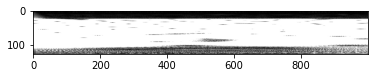

In [15]:
# esta es la imagen final
print(imgRGB.shape)
plt.imshow(imgRGB)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(128, 1000, 3)


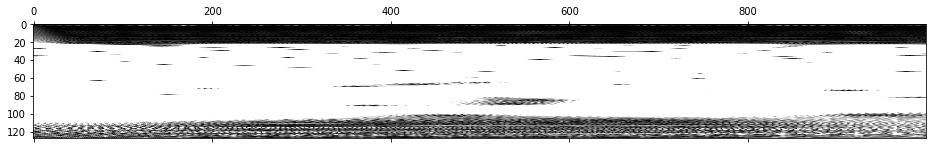

In [16]:
# creo esta es la imagen chida
print(imgRGB.shape)
plt.matshow(imgRGB)
plt.show()